In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
df['target'] = pd.DataFrame(iris.target)

In [13]:
# df['target'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'target'],axis='columns',inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [21]:
km = KMeans(n_clusters=3)
pred = km.fit_predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
df['cluster'] = pred
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [26]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

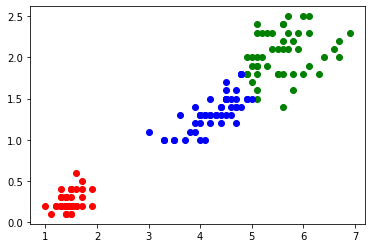

In [27]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')

In [30]:
sse = []
cl_range = range(1,10)
for i in cl_range:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

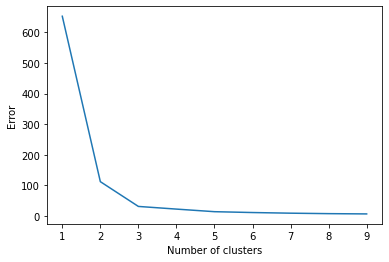

In [32]:
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.plot(cl_range, sse)

In [33]:
new_df = pd.DataFrame(iris.data, columns=iris.feature_names)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
sse = []
clst_range = range(1,10)
for i in clst_range:
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    sse.append(km.inertia_)

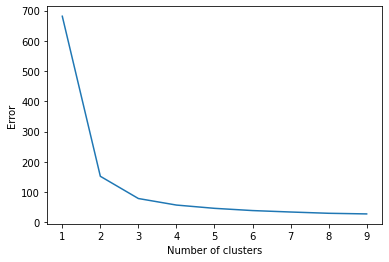

In [37]:
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.plot(clst_range, sse)

In [56]:
km = KMeans(n_clusters=3)
predSt = km.fit_predict(new_df)
predSt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [57]:
new_df['cluster'] = predSt
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
new_df1 = new_df[new_df.cluster == 0]
new_df2 = new_df[new_df.cluster == 1]
new_df3 = new_df[new_df.cluster == 2]

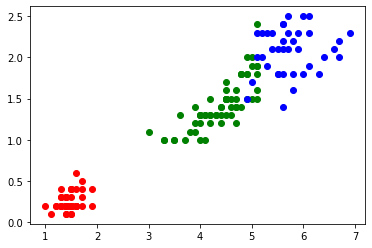

In [61]:
plt.scatter(new_df1['petal length (cm)'], new_df1['petal width (cm)'], color='red')
plt.scatter(new_df2['petal length (cm)'], new_df2['petal width (cm)'], color='green')
plt.scatter(new_df3['petal length (cm)'], new_df3['petal width (cm)'], color='blue')

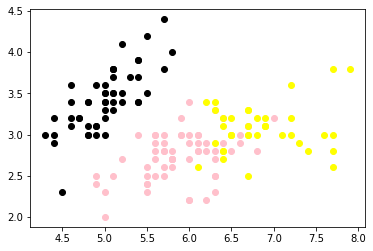

In [64]:
plt.scatter(new_df1['sepal length (cm)'], new_df1['sepal width (cm)'], color='black')
plt.scatter(new_df2['sepal length (cm)'], new_df2['sepal width (cm)'], color='pink')
plt.scatter(new_df3['sepal length (cm)'], new_df3['sepal width (cm)'], color='yellow')

In [66]:
km.predict([[6.7, 3.0, 5.2, 2.3]])

D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [68]:
import joblib
joblib.dump(km, 'kmeans_iris.pkl')

['kmeans_iris.pkl']